In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

model inference gist: https://gist.github.com/yqngzh/9c5a63ad2a1dba05f681323d23fc5feb

In [44]:
df_v1 = pd.read_csv("/Users/yzhang/development/yzhang-adhoc-analysis/2024Q1_semantic_relevance/v1_model_preds.csv")
df_v2 = pd.read_csv("/Users/yzhang/development/yzhang-adhoc-analysis/2024Q1_semantic_relevance/v2_model_preds.csv")

In [45]:
df_v1.head()

,query,listingId,title,gold_label,teacher_label,teacher_score_1,teacher_score_4,integration_label,integration_score_1,integration_score_4,retrieval_label,retrieval_score
0,royal purple,184185194,10 Pcs 8-10&quot; 10-12&quot; 12-14&quot; 14-1...,1,4,0.214370,0.682899,4,0.110600,0.615366,4.0,0.452526
1,royal purple,227662738,100 pcs purple ostrich feather plumes for wedd...,4,4,0.194096,0.720645,4,0.147551,0.615842,4.0,0.467745
2,royal purple,651859700,"Royal Purple Hand Spun Merino Wool, DK / Worst...",4,4,0.001926,0.996316,4,0.021699,0.933988,NaN,NaN
3,royal purple,731666840,TRICORN &quot;BATHORY&quot; Royal Purple Hat f...,4,4,0.025503,0.970031,4,0.044830,0.932745,NaN,NaN
4,royal purple,881161512,Fanya Kaftan Dress ( Royal Dark purple )// kaf...,4,4,0.026000,0.965567,4,0.037522,0.936151,NaN,NaN


In [7]:
def compute_fpr_fnr(label_vec, pred_scores, thresholds_vec):
    fpr_vec = []
    fnr_vec = []
    for thresh in thresholds_vec:
        pred_label = [4 if x > thresh else 1 for x in pred_scores]
        tn, fp, fn, tp = confusion_matrix(label_vec, pred_label).ravel()
        curr_fpr = fp / (fp + tn)
        curr_fnr = fn / (fn + tp)
        fpr_vec.append(curr_fpr)
        fnr_vec.append(curr_fnr)
    return fpr_vec, fnr_vec

In [ ]:
THRESHOLDS = [x / 100.0 for x in range(0, 101, 2)]   

# V1 eval data

In [26]:
## gold label
v1_gold_1vr = df_v1.gold_label.apply(lambda x: 1 if x == 1 else 4)  # 1 vs rest binary label
v1_gold_1vr.value_counts()

4    2466
1     439
Name: gold_label, dtype: int64

In [23]:
# use score4
teacher_score4_fpr, teacher_score4_fnr = compute_fpr_fnr(v1_gold_1vr, df_v1.teacher_score_4, THRESHOLDS)
integ_score4_fpr, integ_score4_fnr = compute_fpr_fnr(v1_gold_1vr, df_v1.integration_score_4, THRESHOLDS)

# use 1 - score1
teacher_score1_fpr, teacher_score1_fnr = compute_fpr_fnr(v1_gold_1vr, 1.0 - df_v1.teacher_score_1, THRESHOLDS)
integ_score1_fpr, integ_score1_fnr = compute_fpr_fnr(v1_gold_1vr, 1.0 - df_v1.integration_score_1, THRESHOLDS)

In [35]:
v1_score4_df = pd.DataFrame({
    "thresholds": THRESHOLDS,
    "teacher_FPR": teacher_score4_fpr,
    "teacher_FNR": teacher_score4_fnr,
    "integration_FPR": integ_score4_fpr,
    "integration_FNR": integ_score4_fnr,
})
v1_score4_df

,thresholds,teacher_FPR,teacher_FNR,integration_FPR,integration_FNR
0,0.00,1.000000,0.000000,1.000000,0.000000
1,0.02,0.993166,0.000000,1.000000,0.000000
2,0.04,0.913440,0.000811,1.000000,0.000000
3,0.06,0.883827,0.002839,1.000000,0.000000
4,0.08,0.861048,0.003244,1.000000,0.000000
5,0.10,0.840547,0.004055,1.000000,0.000000
6,0.12,0.813212,0.006083,1.000000,0.000000
7,0.14,0.794989,0.009327,0.997722,0.001217
8,0.16,0.776765,0.012976,0.993166,0.002839
9,0.18,0.760820,0.018654,0.981777,0.004055


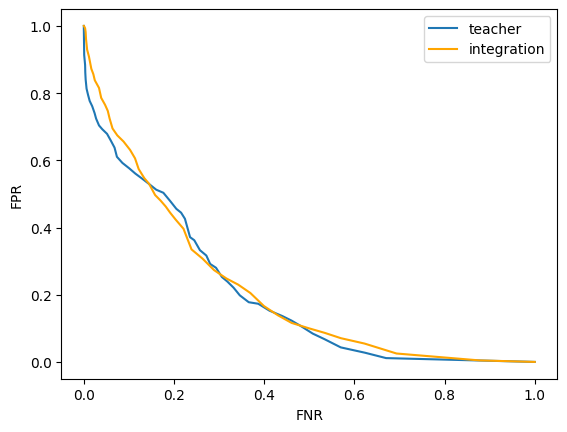

In [38]:
plt.plot(v1_score4_df.teacher_FNR, v1_score4_df.teacher_FPR, label="teacher")
plt.plot(v1_score4_df.integration_FNR, v1_score4_df.integration_FPR, label="integration", color="orange")

plt.xlabel("FNR")
plt.ylabel("FPR")
plt.legend()
plt.show()

In [39]:
v1_score1_df = pd.DataFrame({
    "thresholds": THRESHOLDS,
    "teacher_FPR": teacher_score1_fpr,
    "teacher_FNR": teacher_score1_fnr,
    "integration_FPR": integ_score1_fpr,
    "integration_FNR": integ_score1_fnr,
})
v1_score1_df

,thresholds,teacher_FPR,teacher_FNR,integration_FPR,integration_FNR
0,0.00,1.000000,0.000000,1.000000,0.000000
1,0.02,1.000000,0.000000,1.000000,0.000000
2,0.04,0.970387,0.000000,1.000000,0.000000
3,0.06,0.920273,0.000811,1.000000,0.000000
4,0.08,0.886105,0.001622,1.000000,0.000000
5,0.10,0.872437,0.002433,1.000000,0.000000
6,0.12,0.861048,0.002433,1.000000,0.000000
7,0.14,0.851936,0.004055,1.000000,0.000000
8,0.16,0.833713,0.005272,1.000000,0.000000
9,0.18,0.815490,0.005272,1.000000,0.000000


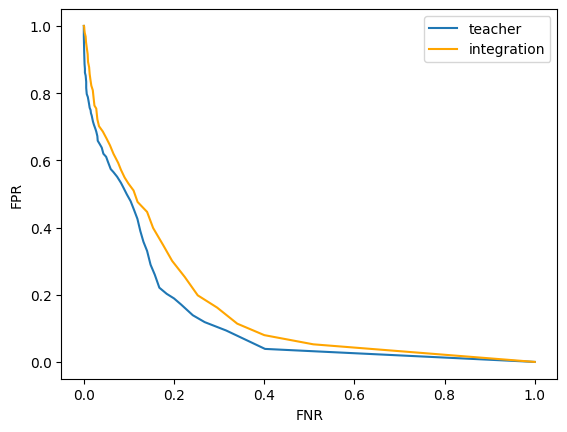

In [40]:
plt.plot(v1_score1_df.teacher_FNR, v1_score1_df.teacher_FPR, label="teacher")
plt.plot(v1_score1_df.integration_FNR, v1_score1_df.integration_FPR, label="integration", color="orange")

plt.xlabel("FNR")
plt.ylabel("FPR")
plt.legend()
plt.show()

# V2 data

In [46]:
v2_gold_1vr = df_v2.gold_label.apply(lambda x: 1 if x == 1 else 4)  # 1 vs rest binary label
v2_gold_1vr.value_counts()

4    25980
1     3976
Name: gold_label, dtype: int64

In [47]:
# use score4
teacher_score4_fpr, teacher_score4_fnr = compute_fpr_fnr(v2_gold_1vr, df_v2.teacher_score_4, THRESHOLDS)
integ_score4_fpr, integ_score4_fnr = compute_fpr_fnr(v2_gold_1vr, df_v2.integration_score_4, THRESHOLDS)

# use 1 - score1
teacher_score1_fpr, teacher_score1_fnr = compute_fpr_fnr(v2_gold_1vr, 1.0 - df_v2.teacher_score_1, THRESHOLDS)
integ_score1_fpr, integ_score1_fnr = compute_fpr_fnr(v2_gold_1vr, 1.0 - df_v2.integration_score_1, THRESHOLDS)

In [48]:
v2_score4_df = pd.DataFrame({
    "thresholds": THRESHOLDS,
    "teacher_FPR": teacher_score4_fpr,
    "teacher_FNR": teacher_score4_fnr,
    "integration_FPR": integ_score4_fpr,
    "integration_FNR": integ_score4_fnr,
})
v2_score4_df

,thresholds,teacher_FPR,teacher_FNR,integration_FPR,integration_FNR
0,0.00,1.000000,0.000000,1.000000,0.000000
1,0.02,0.970573,0.002617,1.000000,0.000000
2,0.04,0.912726,0.007467,1.000000,0.000000
3,0.06,0.865443,0.013125,0.999497,0.000000
4,0.08,0.820926,0.019284,0.997485,0.000000
5,0.10,0.781439,0.026135,0.993712,0.000231
6,0.12,0.744215,0.033449,0.984909,0.000731
7,0.14,0.705231,0.041070,0.970825,0.002232
8,0.16,0.675050,0.050115,0.954728,0.003580
9,0.18,0.640594,0.058737,0.935865,0.005928


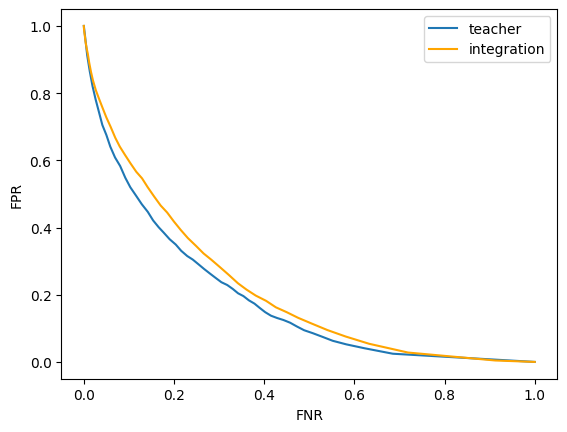

In [49]:
plt.plot(v2_score4_df.teacher_FNR, v2_score4_df.teacher_FPR, label="teacher")
plt.plot(v2_score4_df.integration_FNR, v2_score4_df.integration_FPR, label="integration", color="orange")

plt.xlabel("FNR")
plt.ylabel("FPR")
plt.legend()
plt.show()

In [50]:
v2_score1_df = pd.DataFrame({
    "thresholds": THRESHOLDS,
    "teacher_FPR": teacher_score1_fpr,
    "teacher_FNR": teacher_score1_fnr,
    "integration_FPR": integ_score1_fpr,
    "integration_FNR": integ_score1_fnr,
})
v2_score1_df

,thresholds,teacher_FPR,teacher_FNR,integration_FPR,integration_FNR
0,0.00,1.000000,0.000000,1.000000,0.000000
1,0.02,0.988934,0.000924,1.000000,0.000000
2,0.04,0.944920,0.003965,1.000000,0.000000
3,0.06,0.907696,0.007429,1.000000,0.000000
4,0.08,0.876761,0.010739,1.000000,0.000000
5,0.10,0.845573,0.014088,0.999497,0.000000
6,0.12,0.816398,0.018861,0.997988,0.000077
7,0.14,0.788229,0.022864,0.995976,0.000115
8,0.16,0.760312,0.027059,0.990191,0.000308
9,0.18,0.731640,0.031293,0.982394,0.000962


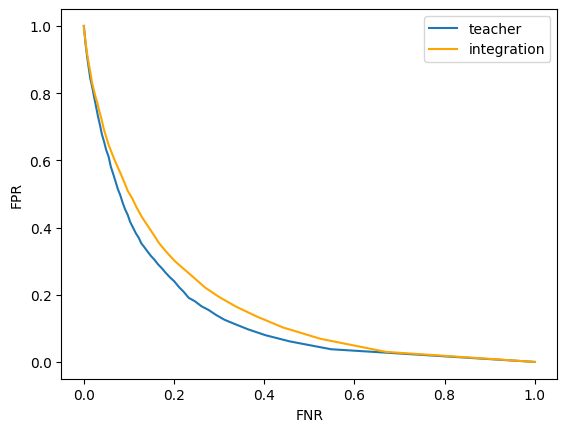

In [51]:
plt.plot(v2_score1_df.teacher_FNR, v2_score1_df.teacher_FPR, label="teacher")
plt.plot(v2_score1_df.integration_FNR, v2_score1_df.integration_FPR, label="integration", color="orange")

plt.xlabel("FNR")
plt.ylabel("FPR")
plt.legend()
plt.show()